# **TO DO FIRST**

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

https://github.com/bchao1/Anime-Face-Dataset/

https://www.kaggle.com/tunguz/70000-real-faces-1

In [3]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

# ***Downloading and Extracting Data***

In [ ]:
from google.colab import files
my_file=files.upload()

In [5]:
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
# !kaggle datasets download -d tunguz/70000-real-faces-1 -p '/content/drive/My Drive/dl_projects'    # if you want to download directly in Gdrive
!kaggle datasets download -d tunguz/70000-real-faces-1 -p

In [ ]:
%ls '/content/drive/My Drive/dl_projects'

In [ ]:
!mkdir -p '/content/drive/My Drive/dl_projects/anime_vs_human/humans'
# !unzip "/content/drive/My Drive/dl_projects/70000-real-faces-1.zip" -d '/content/drive/My Drive/dl_projects/humans'
!unzip "*.zip" -d '/content/drive/My Drive/dl_projects/anime_vs_human/humans'

**Get Gdrive data**

In [ ]:
!pip install PyDrive

In [17]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [15]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [57]:
downloaded = drive.CreateFile({'id':"1HG7YnakUkjaxtNMclbl2t5sJwGLcHYsI"})
downloaded.GetContentFile('data.tgz')

InvalidConfigError: ignored

In [ ]:
# tar -zxvf '/content/drive/My Drive/dl_projects/Copy of data.tgz' -C '/content/drive/My Drive/dl_projects/'

!tar -xvzf '/content/drive/My Drive/dl_projects/Copy of data.tgz' -C '/content/drive/My Drive/dl_projects/anime_vs_human'

# ***Data without storing in Gdrive***

**Downloading Human Faces**

In [4]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [5]:
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [7]:
!kaggle datasets download -d tunguz/70000-real-faces-1 -p '/content/drive/My Drive/dl_projects'

100% 19.1G/19.1G [08:07<00:00, 30.5MB/s]
100% 19.1G/19.1G [08:07<00:00, 42.0MB/s]


In [ ]:
import os
os.makedirs("anime_vs_human/humans", exist_ok=True)
!unzip "/content/drive/My Drive/dl_projects/*.zip" -d 'anime_vs_human/humans'

**Downlaoding Anime Faces**

In [9]:
!pip install PyDrive

In [10]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [11]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [13]:
downloaded = drive.CreateFile({'id':"1HG7YnakUkjaxtNMclbl2t5sJwGLcHYsI"})
downloaded.GetContentFile('data.tgz')

ApiRequestError: ignored

In [ ]:
os.makedirs("anime_vs_human/anime", exist_ok=True)
!tar -xvzf 'data.tgz' -C 'anime_vs_human/'

# ***Kaggle uploaded data - Start from here***

https://www.kaggle.com/sanyam1992000/anime-faces-vs-human-faces

In [8]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [9]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [10]:
!kaggle datasets download -d sanyam1992000/anime-faces-vs-human-faces

 99% 1.26G/1.26G [00:13<00:00, 147MB/s]
100% 1.26G/1.26G [00:14<00:00, 96.6MB/s]


In [ ]:
!unzip "*.zip"

# ***Here it all starts***




In [12]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/Data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

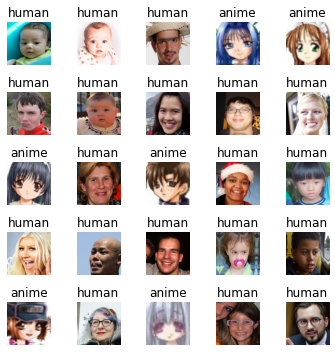

In [13]:
data.show_batch(rows=5, figsize=(5,5))

In [14]:
print(data.classes)
len(data.classes)

['anime', 'human']


2

In [16]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
# help(cnn_learner)
# doc(cnn_learner)

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.089216,0.000000,1.000000,01:15
1,0.034167,0.000001,1.000000,01:13
2,0.017473,0.000002,1.000000,01:14
3,0.009561,0.000001,1.000000,01:12


In [20]:
os.makedirs("/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces",exist_ok=True)
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

In [23]:
learn.save(dir+"/Stage-2")

In [ ]:
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

learn.load(dir + "/Stage-2")

In [26]:
learn.export(dir+"/export.pkl")

# `Prediction`

In [27]:
dir = '/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces'
predictor = load_learner(dir)

In [6]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

In [61]:
from google.colab import files
my_file = files.upload()

Saving sanyam.jpg to sanyam.jpg


In [62]:
path = list(my_file.keys())[0]

In [63]:
print(my_predictor(path))

human
